## Part 1

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
import math

In [18]:
df=pd.read_csv("TopticaCavityData.csv")

In [19]:
df = df.rename(columns={df.columns[0]: 'Time(ms)', df.columns[2]: 'Voltage(V)'})

#Select the first part of the df

df_1=df[(df["Time(ms)"]>0) & (df["Time(ms)"]<40)]

voltage=df_1["Voltage(V)"] #voltage ,y
time=df_1["Time(ms)"] #time,x

pi = math.pi
t_fsr=20.733531 #in ms

In [20]:
def airy_funct(x,x0,F,C,Ip,t_fsr):
    
    numerator= Ip
    denominator= 1 + ((2*F/np.pi)**2 )*np.sin(np.pi*(x-x0)/t_fsr)**2
    return (numerator/denominator)+ C

initial_guess=[8.70,300,-0.001,0.04,20.73]
# x0=8.72,F=300,C=-0.001,Ip=0.04345,t_fsr

#Fit the model
max_voltage=max(voltage)
#limits=([8,200,-0.01,0.040,20],[9,400,0.01,1.05*max_voltage,21])
params,_=curve_fit(airy_funct,time,voltage,p0=initial_guess)

#Extract fitted parameters
x0,F,C,Ip,t_fsr=params


Finesse: 138.5
Intensity peak:0.0492
Offset:-0.001
T_fsr: 20.7175
x0: 8.7486


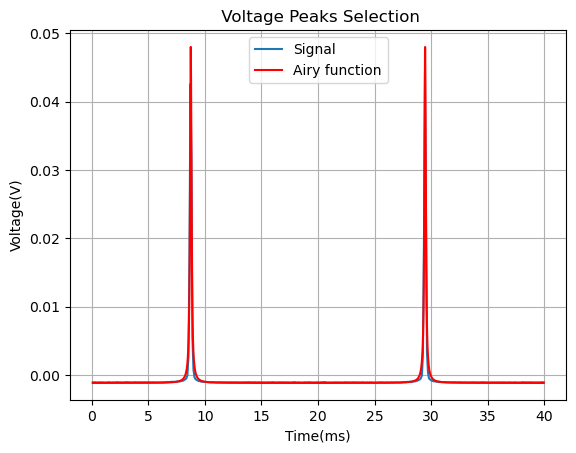

In [21]:
# Detect all peaks

#voltage_smooth = savgol_filter(voltage, window_length=11, polyorder=3)
#peaks, _ = find_peaks(voltage_smooth, prominence=0.01)

#Generate fit curve
time_fit=np.linspace(min(time),max(time),5000)
voltage_fit=airy_funct(time_fit,*params)

#Print params
print(f"Finesse:{F: .1f}")
print(f"Intensity peak:{Ip:.4f}")
print(f"Offset:{C:.3f}")
print(f"T_fsr:{t_fsr: .4f}")
print(f"x0:{x0: .4f}")

#Accuracy,R-squared (Coefficient of Determination)
#from sklearn.metrics import r2_score
#r2=r2_score(voltage,voltage_fit)
#print(f"R^{2} ={r2 : .4f}" )

# Plotting
plt.plot(time, voltage, label='Signal')
#plt.plot(peak_time, peak_voltage, 'ro', label='Peaks')
plt.plot(time_fit,voltage_fit,"r-",label=f"Airy function")
plt.legend()
plt.title(' Voltage Peaks Selection')
plt.xlabel('Time(ms)')
plt.ylabel('Voltage(V)')
plt.grid(True)
plt.show()


###  2nd part


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
import math

In [23]:
df=pd.read_csv("TopticaCavityData.csv")
df = df.rename(columns={df.columns[0]: 'Time(ms)', df.columns[2]: 'Voltage(V)'})

#Select the first part of the df

#df_1=df[(df["Time(ms)"]>60) & (df["Time(ms)"]<90)]

In [24]:
df_1 = df[df["Time(ms)"] > 60]
#df_1 = df[df["Time(ms)"] > 60].copy()
#df_1.loc[:, "Time(ms)"] -= 60

#df_2=df_1
#df_2

In [25]:
voltage=df_1["Voltage(V)"] #voltage ,y
time=df_1["Time(ms)"] #time,x

pi = math.pi


In [26]:
def airy_funct(x,x0,F,C,Ip,t_fsr):
    
    numerator= Ip
    denominator= 1 + ((2*F/np.pi)**2 )*np.sin(np.pi*(x-x0)/t_fsr)**2
    return (numerator/denominator) + C

initial_guess=[62.60,300,-0.001,0.04,20.4]
# x0,F=200-400,C,Ip=0.04,t_fsr=20.4

#Fit the model
max_voltage=max(voltage)
#limits=([60,200,-0.001,0.035,20],[63,400,0.01,0.043,21])
params,_=curve_fit(airy_funct,time,voltage,p0=initial_guess)

#Extract fitted parameters
x0,F,C,Ip,t_fsr=params


Finesse: 192.3
Intensity peak Voltage:0.0656
Offset:-0.001
T_fsr: 20.2948
x0: 62.6851
R^2 = 0.9951


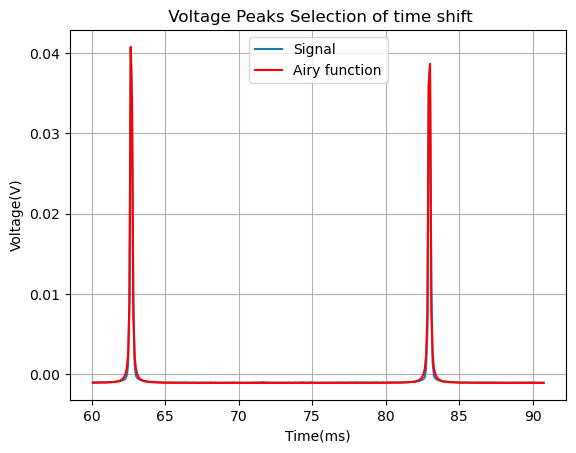

In [27]:
# Detect all peaks

#voltage_smooth = savgol_filter(voltage, window_length=11, polyorder=3)
#peaks, _ = find_peaks(voltage_smooth, prominence=0.01)

#Generate fit curve
time_fit=np.linspace(min(time),max(time),len(voltage))
voltage_fit=airy_funct(time_fit,*params)

#Print params
print(f"Finesse:{F: .1f}")
print(f"Intensity peak Voltage:{Ip:.4f}")
print(f"Offset:{C:.3f}")
print(f"T_fsr:{t_fsr: .4f}")
print(f"x0:{x0: .4f}")

#Accuracy,R-squared (Coefficient of Determination)
from sklearn.metrics import r2_score
r2=r2_score(voltage,voltage_fit)
print(f"R^{2} ={r2 : .4f}" )

# Plotting
plt.plot(time, voltage, label='Signal')
#plt.plot(peak_time, peak_voltage, 'ro', label='Peaks')
plt.plot(time_fit,voltage_fit,"r-",label=f"Airy function")
plt.legend()
plt.title(' Voltage Peaks Selection of time shift')
plt.xlabel('Time(ms)')
plt.ylabel('Voltage(V)')
plt.grid(True)
plt.show()
